In [4]:
#1.Create heatmap as Ground Truth
import glob
import csv
import numpy
import matplotlib.pyplot as plt
from PIL import Image
import os 

size = 20
#create gussian heatmap 
def gaussian_kernel(variance):
    x, y = numpy.mgrid[-size:size+1, -size:size+1]
    g = numpy.exp(-(x**2+y**2)/float(2*variance))
    return g 


#make the Gaussian by calling the function
variance = 10
gaussian_kernel_array = gaussian_kernel(variance)
#rescale the value to 0-255
gaussian_kernel_array =  gaussian_kernel_array * 255/gaussian_kernel_array[len(gaussian_kernel_array)/2][len(gaussian_kernel_array)/2]
#change type as integer
gaussian_kernel_array = gaussian_kernel_array.astype(int)

#show heatmap 
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('gray'), interpolation='nearest')
plt.colorbar()
plt.show()



#create the heatmap as ground truth
for index in range(1,82):
        #################change the path####################################################
        pics = glob.glob("/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(index) + "/*.jpg")
        output_pics_path = "/home/nayara/Documentos/TrackNet/GroundTruth/Clip" + str(index) 
        label_path = "/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(index) + "/Label.csv"
        ####################################################################################
        
        #check if the path need to be create
        if not os.path.exists(output_pics_path ):
            os.makedirs(output_pics_path)

            
        #read csv file
        with open(label_path, 'rb') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            #skip the headers
            next(spamreader, None)  
            
            for row in spamreader:
                    visibility = int(float(row[1]))
                    FileName = row[0]
                    #if visibility == 0, the heatmap is a black image
                    if visibility == 0:
                        heatmap = Image.new("RGB", (1280, 720))
                        pix = heatmap.load()
                        for i in range(1280):
                            for j in range(720):
                                    pix[i,j] = (0,0,0)
                    else:
                        x = int(float(row[2]))
                        y = int(float(row[3]))
                        
                        #create a black image
                        heatmap = Image.new("RGB", (1280, 720))
                        pix = heatmap.load()
                        for i in range(1280):
                            for j in range(720):
                                    pix[i,j] = (0,0,0)
                                    
                        #copy the heatmap on it
                        for i in range(-size,size+1):
                            for j in range(-size,size+1):
                                    if x+i<1280 and x+i>=0 and y+j<720 and y+j>=0 :
                                        temp = gaussian_kernel_array[i+size][j+size]
                                        if temp > 0:
                                            pix[x+i,y+j] = (temp,temp,temp)
                    #save image
                    heatmap.save(output_pics_path + "/" + FileName.split('.')[-2] + ".png", "PNG")








<Figure size 640x480 with 2 Axes>

In [7]:
#2.Output training data name to cvs file for model 1
import numpy as np
import cv2
import glob
import itertools
import random
import csv

training_file_name = "training_model1.csv"
testing_file_name = "testing_model1.csv"
visibility_for_testing = []
with open(training_file_name,'w') as file:
    #for index in range(1,82):
        #################change the path####################################################
        images_path = "/mnt/6308D0381D0EA090/DOUTORADO/coco/images/train2017/"
        annos_path = "/mnt/6308D0381D0EA090/DOUTORADO/coco/groundtruth/train2017/"
        ####################################################################################

        images = glob.glob( images_path + "*.jpg"  ) + glob.glob( images_path + "*.png"  ) +  glob.glob( images_path + "*.jpeg"  )
        images.sort()
        annotations  = glob.glob( annos_path + "*.jpg"  ) + glob.glob( annos_path + "*.png"  ) +  glob.glob( annos_path + "*.jpeg"  )
        annotations.sort()
        
        #check if annotation counts equals to image counts
        assert len( images ) == len(annotations)
        for im , seg in zip(images,annotations):
            assert(  im.split('/')[-1].split(".")[0] ==  seg.split('/')[-1].split(".")[0] )

        #visibility = {}
        #with open(images_path + "Label.csv", 'rb') as csvfile:
        #    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        #    #skip the headers
        #    next(spamreader, None)  
            
        #    for row in spamreader:
        #        #row[0] => image name
        #        #row[1] => visibility class
        #        visibility[row[0]] = row[1]
                    
                    
        #write all of images path
        for i in range(0,len(images)): 
                #remove image path, get image name   
                #ex: D/Dateset/Clip1/0056.jpg => 0056.jpg 
                file_name = images[i].split('/')[-1]
                
                #visibility 3 will not be used for training
                #if visibility[file_name] == '3':
                #    visibility_for_testing.append(images[i])
                    
                #check if file image name same as annotation name
                assert(  images[i].split('/')[-1].split(".")[0] ==  annotations[i].split('/')[-1].split(".")[0] )
                #write all of images path
                file.write(images[i] + "," + images[i] + "," + images[i] + "," + annotations[i] + "\n")
                
                    

file.close()

#read all of images path
lines = open(training_file_name).read().splitlines()

#70% for training, 30% for testing 
training_images_number = int(len(lines)*0.7)
testing_images_number = len(lines) - training_images_number
#print "Total images:", len(lines), "Training images:", training_images_number,"Testing images:", testing_images_number

#shuffle the images
random.shuffle(lines)
#training images
with open(training_file_name,'wb') as training_file:
    training_file.write("img, img1, img2, ann\n")
    #testing images
    with open(testing_file_name,'wb') as testing_file:
        testing_file.write("img, img1, img2, ann\n")
        
        #write img, img1, img2, ann to csv file
        for i in range(0,len(lines)):
            if lines[i] != "":
                if training_images_number > 0 and lines[i].split(",")[0] not in visibility_for_testing :
                    training_file.write(lines[i] + "\n")
                    training_images_number -=1
                else:
                    testing_file.write(lines[i] + "\n")
training_file.close()
testing_file.close()
    

AssertionError: 

In [18]:
#3.Output training data name to cvs file for model 2
import numpy as np
import cv2
import glob
import itertools
import random
import csv

training_file_name = "training_model2.csv"
testing_file_name = "testing_model2.csv"
visibility_for_testing = []

with open(training_file_name,'wb') as file:
    for index in range(1,82):
        #################change the path####################################################
        images_path = "/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(index) + "/"
        annos_path = "/home/nayara/Documentos/TrackNet/GroundTruth/Clip" + str(index) + "/"
        ####################################################################################

        images = glob.glob( images_path + "*.jpg"  ) + glob.glob( images_path + "*.png"  ) +  glob.glob( images_path + "*.jpeg"  )
        images.sort()
        annotations  = glob.glob( annos_path + "*.jpg"  ) + glob.glob( annos_path + "*.png"  ) +  glob.glob( annos_path + "*.jpeg"  )
        annotations.sort()
        
        #check if annotation counts equals to image counts
        assert len( images ) == len(annotations)
        for im , seg in zip(images,annotations):
            assert(  im.split('/')[-1].split(".")[0] ==  seg.split('/')[-1].split(".")[0] )

        visibility = {}
        with open(images_path + "Label.csv", 'rb') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            #skip the headers
            next(spamreader, None)  
            
            for row in spamreader:
                visibility[row[0]] = row[1]
                    
                    
        #output all of images path, 0000.jpg & 0001.jpg cant be used as input, so we have to start from 0002.jpg
        for i in range(2,len(images)): 
                #remove image path, get image name   
                #ex: D/Dateset/Clip1/0056.jpg => 0056.jpg 
                file_name = images[i].split('/')[-1]
                #visibility 3 will not be used for training
                if visibility[file_name] == '3': 
                    visibility_for_testing.append(images[i])
                #check if file image name same as annotation name
                assert(  images[i].split('/')[-1].split(".")[0] ==  annotations[i].split('/')[-1].split(".")[0] )
                #write all of images path
                file.write(images[i] + "," + images[i-1] + "," + images[i-2] + "," + annotations[i] + "\n")
                
                    

file.close()

#read all of images path
lines = open(training_file_name).read().splitlines()

#70% for training, 30% for testing 
training_images_number = int(len(lines)*0.7)
testing_images_number = len(lines) - training_images_number
print "Total images:", len(lines), "Training images:", training_images_number,"Testing images:", testing_images_number

#shuffle the images
random.shuffle(lines)
#training images
with open(training_file_name,'wb') as training_file:
    training_file.write("img, img1, img2, ann\n")
    #testing images
    with open(testing_file_name,'wb') as testing_file:
        testing_file.write("img, img1, img2, ann\n")
        
        #write img, img1, img2, ann to csv file
        for i in range(0,len(lines)):
            if lines[i] != "":
                if training_images_number > 0 and lines[i].split(",")[0] not in visibility_for_testing :
                    training_file.write(lines[i] + "\n")
                    training_images_number -=1
                else:
                    testing_file.write(lines[i] + "\n")
                    
training_file.close()
testing_file.close()
    

Total images: 17250 Training images: 12075 Testing images: 5175


In [6]:
#4.Output All of training data name to cvs file for new labeling
import numpy as np
import cv2
import glob
import itertools
import random
import csv
import os

training_file_name = "training_model3.csv"

count = 0
with open(training_file_name,'wb') as file:


    for g in range(1,9):
        #################change the path####################################################
        LabelingData_dir = '/home/nayara/Documentos/TrackNet/LabelingData/game' + str(g)
        ####################################################################################
        list = os.listdir(LabelingData_dir) # dir is your directory path
        number_clips = len(list)
        for index in range(1,number_clips+1):
            #################change the path####################################################
            images_path = "/home/nayara/Documentos/TrackNet/LabelingData/game" + str(g) + "/Clip" + str(index) + "/"
            annos_path = "/home/nayara/Documentos/TrackNet/LabelingData/game" + str(g) + "_GroundTruth/Clip" + str(index) + "/"
            ####################################################################################

            images = glob.glob( images_path + "*.jpg"  ) + glob.glob( images_path + "*.png"  ) +  glob.glob( images_path + "*.jpeg"  )
            images.sort()
            annotations  = glob.glob( annos_path + "*.jpg"  ) + glob.glob( annos_path + "*.png"  ) +  glob.glob( annos_path + "*.jpeg"  )
            annotations.sort()

            #check if annotation counts equals to image counts
            assert len( images ) == len(annotations)
            for im , seg in zip(images,annotations):
                assert(  im.split('/')[-1].split(".")[0] ==  seg.split('/')[-1].split(".")[0] )

                
            with open(images_path + "Label.csv", 'rb') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                #skip the headers
                next(spamreader, None)  

            count+=2
            
            #output all of images path, 0000.jpg & 0001.jpg cant be used as input, so we have to start from 0002.jpg
            for i in range(2,len(images)): 
                    #remove image path, get image name   
                    #ex: D/Dateset/Clip1/0056.jpg => 0056.jpg 
                    file_name = images[i].split('/')[-1]
                    
                    #check if file image name same as annotation name
                    assert( images[i].split('/')[-1].split(".")[0] ==  annotations[i].split('/')[-1].split(".")[0] )
                    
                    #write all of images path
                    file.write(images[i] + "," + images[i-1] + "," + images[i-2] + "," + annotations[i] + "\n")
                    count+=1
print "Total Count:", count


file.close()

Total Count: 16118


In [7]:
#5.output training csv file for new labeling image

output_file_name = "training_model3.csv"

training_file_name = "training_model3.csv"
#read all of images path
lines = open(training_file_name).read().splitlines()


training_file_name1 = "training_model2.csv"
#read all of images path
lines1 = open(training_file_name1).read().splitlines()

#combine two file
new_lines = lines1[1:]+lines

#shuffle the images
random.shuffle(new_lines)
#training images
with open(output_file_name,'wb') as training_file:
        training_file.write("img, img1, img2, ann\n")

        #write img, img1, img2, ann to csv file
        for i in range(0,len(new_lines)):
            if new_lines[i] != "":
                training_file.write(new_lines[i] + "\n")
                    
training_file.close()

In [17]:
#Check Accuracy
import glob
import csv
import cv2
import numpy
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

x_array = []
c_array = []
PE_larger_than_5  = []
for model in [1, 2]:
    True_Positive = [0,0,0,0]
    False_Positive = [0,0,0,0]
    Negative = [0,0,0,0]
    pic_number = 0
    statistics  = []
    GroundTruth = {}
    
    for number in range(1,82):
        #################change the path####################################################
        label_path = "/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(number) + "/Label.csv"
        img_path = "/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(number) + "/"
        ####################################################################################

        #read ground truth from Label.csv
        with open(label_path, 'rb') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            next(spamreader, None)  # skip the headers
            for row in spamreader:
                if row[2] != '':
                    FileName = row[0]
                    visibility = int(float(row[1]))
                    x = int(row[2])
                    y = int(row[3])
                    GroundTruth[img_path+FileName] = [visibility,x,y]
                else:
                    FileName = row[0]
                    GroundTruth[img_path+FileName] = [0,-1,-1]



    #################change the path####################################################
    testing_file_path = "/home/nayara/Documentos/TrackNet/Code/testing_model" + str(model)+".csv"
    predition_path = "/home/nayara/Documentos/TrackNet/Data/Prediction/Model" + str(model)+ "/"
    ####################################################################################

    #predict all of the testing image, and check True_Positive, False_Positive, Negative
    with open(testing_file_path, 'rb') as csvfile:    
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        next(spamreader, None)  # skip the headers
        for row in spamreader:
            pic_name = row[0]
            pic_number = pic_number + 1
            #################change the Dataset path####################################################
            heatmap = cv2.imread(pic_name.replace( "/home/nayara/Documentos/TrackNet/Data/Dataset/",  predition_path),0) 
            ####################################################################################
            
            #heatmap is converted into a binary image by threshold method.
            ret,heatmap = cv2.threshold(heatmap,127,255,cv2.THRESH_BINARY)
            circles = cv2.HoughCircles(heatmap, cv2.HOUGH_GRADIENT,dp=1,minDist=10,param2=2,minRadius=2,maxRadius=7)
            
            #if there is no ball in ground truth, any prediction should be False Positive, else be Negative
            if GroundTruth[pic_name][1] == -1 and GroundTruth[pic_name][2] == -1:
                if circles is not None:
                        False_Positive[GroundTruth[pic_name][0]] += 1
                else:
                        Negative[GroundTruth[pic_name][0]] += 1
            
            #the ground truth has x, y be labeled
            else:
                if circles is not None:
                        #if there has only one circle be predicted
                        if len(circles[0]) == 1:
                            x = int(circles[0][0][0])
                            y = int(circles[0][0][1])
                            x2 = pow(GroundTruth[pic_name][1]-x,2)
                            y2 = pow(GroundTruth[pic_name][2]-y,2)
                            
                            #In order to draw the plot, save all of distance in statistics 
                            statistics.append(pow(x2+y2,0.5))
                            
                            #check if distance > 5
                            if pow(x2+y2,0.5) > 5: 
                                False_Positive[GroundTruth[pic_name][0]] += 1
                            else:
                                True_Positive[GroundTruth[pic_name][0]] += 1
                        #if there has more than one circle be predicted, the prediction will be seen as Nagative
                        else:
                            Negative[GroundTruth[pic_name][0]] += 1
                else:
                        Negative[GroundTruth[pic_name][0]] += 1

                      
    
    

    print "Model" + str(model) + ": Pictures = ", pic_number
    print True_Positive[0],True_Positive[1],True_Positive[2],True_Positive[3]
    print False_Positive[0],False_Positive[1],False_Positive[2],False_Positive[3]
    print Negative[0],Negative[1],Negative[2],Negative[3]
    TP = True_Positive[1]+True_Positive[2]+True_Positive[3]
    
    print "Precision:", TP/(0.0+TP+False_Positive[0]+False_Positive[1]+False_Positive[2]+False_Positive[3])
    print "Recall:", TP/(0.0+TP+Negative[1]+Negative[2]+Negative[3]+False_Positive[1]+False_Positive[2]+False_Positive[3])
    
    x = []
    y = []
    c = []
    count = 0
    others = 0
    for i in range(0,6):
        x.append( i)
        y.append(0)
        
    for s in statistics:
        if s - float(int(s)) == 0 and s<=5:
            y[int(s)] +=1
            count +=1
        elif s<=5:
            y[int(s)+1] +=1
            count +=1
        else:
            count +=1
            others += 1
    print "Mean:", np.mean(statistics), "Variance", np.var(statistics)
    
    
    for i in range(0,6):
        c.append( round(y[i]/(count+0.0), 4) )
        print str(i),y[i], y[i]/(count+0.0)
    print "Others:", others, others/(count+0.0)
    PE_larger_than_5.append(round(others/(count+0.0)*100, 2))
    x_array.append(x)
    c_array.append(c)
    
    fig, ax = plt.subplots()
    axes = plt.gca()
    axes.set_ylim([0,0.4])
    plt.plot(x,c,color='green', label='Model ' + str(model))
    plt.scatter(x,c,color='blue')
    plt.ylabel('Percentage')
    plt.xlabel('Positioning Error (PE) in Pixel')
    plt.legend()
    plt.show()
    fig.savefig('Model' + str(model) + '.png', dpi=2000)

fig, ax = plt.subplots()
axes = plt.gca()
axes.set_ylim([0,0.4])

plt.scatter(x_array[0],c_array[0],color='limegreen')
plt.plot(x_array[0],c_array[0],color='green',label='Model  I, ' + str(PE_larger_than_5[0]) + '% PE > 5')
for i, txt in enumerate(c_array[0]):
    ax.annotate(str(txt*100)+"%", (x_array[0][i],c_array[0][i]),weight="bold", horizontalalignment = "center")
    
    
plt.scatter(x_array[1],c_array[1],color='chocolate')
plt.plot(x_array[1],c_array[1],color='red', label='Model II, ' + str(PE_larger_than_5[1]) + '% PE > 5', linestyle="--")
for i, txt in enumerate(c_array[1]):
    ax.annotate(str(txt*100)+"%", (x_array[1][i],c_array[1][i]),weight="bold", horizontalalignment = "center")
    
plt.ylabel('Percentage',weight="bold")
plt.xlabel('Positioning Error (PE) in Pixel',weight="bold")
plt.legend()
plt.show()
fig.savefig('Model1&2.png', dpi=2000)

IOError: [Errno 2] No such file or directory: '/home/nayara/Documentos/TrackNet/Code/testing_model1.csv'

In [ ]:
#Programs for testing below

In [36]:
#statistics of Visibility

import glob
import csv
import numpy
import matplotlib.pyplot as plt
from PIL import Image
import os 


visibility = [0,0,0,0]
for index in range(1,82):
    
    #################change the Dataset path####################################################
    label_path = "/media/andersen/D/Thesis/Dataset/Clip" + str(index) + "/Label.csv"
    ############################################################################################

    

    with open(label_path, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        next(spamreader, None)  # skip the headers
        for row in spamreader:
            v = int(row[1])
            visibility[v] +=1
                
print "Visibility 0:", visibility[0]
print "Visibility 1:", visibility[1]
print "Visibility 2:", visibility[2]
print "Visibility 3:", visibility[3]


            




Visibility 0: 659
Visibility 1: 18035
Visibility 2: 2143
Visibility 3: 7


In [ ]:
#Change images name to 0000.jpg, 0001.jpg, 0002.jpg, etc.

#########################################
# This code will change all the file's name, make sure your code is correct!!! 
# Backup your clips if possible  
#########################################
from os import listdir
import os
import shutil
from os.path import isfile, join
import glob
import shutil
slash = "/"
#################change the path####################################################
mypath = "/media/andersen/D/game/Clip"
####################################################################################

for i in range(1,10):
    #sort all of images name
    AllFiles = sorted(glob.glob(mypath + str(i) + "/*.jpg"))
    print len(AllFiles), mypath
    number = 0
    for name in AllFiles:
        #str(number).zfill(4) => padding 0 if str(number) is less than 4 digits
        NewFileName = mypath + str(i) + slash + str(number).zfill(4) + ".jpg"
        shutil.move(name, NewFileName)
        number = number + 1 



In [ ]:
#畫出prediction出來的中心點,黃色8點
import Queue
import glob
import csv
import cv2, os
import numpy
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw



for index in range(1,82):
    #################change the path####################################################
    heatmap_path = "/media/andersen/D/Thesis/Prediction/Model2/Clip" + str(index) + "/"
    frame_path = "/media/andersen/D/Thesis/Dataset/Clip" + str(index) + "/"
    output_path = "/media/andersen/D/Test/Clip" + str(index) + "/"
    ####################################################################################
    
    # In order to draw the trajectory of tennis, we need to save the coordinate of preious 7 frames 
    q = Queue.deque()
    for t in range(0,8):
        q.appendleft(None)   
    
    #get all heatmap pics
    heatmap_pics = sorted(glob.glob(heatmap_path + "*.jpg"))
    
    
    #check if the path need to be create
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    
    for pic in heatmap_pics:
            pic_name =  pic.split('/')[-1]
            heatmap = cv2.imread(heatmap_path + pic_name,0)
            
            #heatmap is converted into a binary image by threshold method.
            ret,heatmap = cv2.threshold(heatmap,127,255,cv2.THRESH_BINARY)
            circles = cv2.HoughCircles(heatmap, cv2.HOUGH_GRADIENT,dp=1,minDist=10,param2=2,minRadius=2,maxRadius=7)
            out = Image.open(frame_path + pic_name) 
            if circles is not None:
                if len(circles) == 1:

                    x = circles[0][0][0]
                    y = circles[0][0][1]


                    q.appendleft([x,y])   # 在左側appendx,y
                    q.pop()    # 在右側pop

                else:
                    q.appendleft(None)   # 在左側append None
                    q.pop()    # 在右側pop

            else:
                    q.appendleft(None)   # 在左側append None
                    q.pop()    # 在右側pop

            #draw the prediciton now + previous 7 prediction 
            for i in range(0,8):
                if q[i] is not None:
                    draw_x = q[i][0]
                    draw_y = q[i][1]
                    bbox =  (draw_x - 2, draw_y - 2, draw_x + 2, draw_y + 2)
                    draw = ImageDraw.Draw(out)
                    draw.ellipse(bbox, outline ='yellow')
                    del draw

            out.save(output_path + pic_name)



In [39]:
#畫出Label出來的中心點,黃色8點
import Queue
import glob
import csv
import cv2
import os
import numpy
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import subprocess
from shutil import copyfile

for index in range(1,82):
    
    # In order to draw the trajectory of tennis, we need to save the coordinate of preious 7 frames 
    q = Queue.deque()
    for t in range(0,8):
        q.appendleft(None)   


    #################change the path####################################################
    output_path = "/media/andersen/D/Test/Clip" + str(index) + "/"
    frame_path = "/media/andersen/D/Thesis/Dataset/Clip" + str(index) + "/"
    ####################################################################################

    #get all pics
    pics = sorted(glob.glob(frame_path + "*.jpg"))

    
    #read coordinate x, y
    with open(frame_path + 'Label.csv', 'rb') as f:
        reader = csv.reader(f)
        csv_list = list(reader)

    x = {}
    y = {}
    for i in range(1, len(csv_list)):
        visibility = int(float(csv_list[i][1]))
        if visibility != 0:
            x[csv_list[i][0]] = float(csv_list[i][2])
            y[csv_list[i][0]] = float(csv_list[i][3])
        else:
            x[csv_list[i][0]] = float(-1)
            y[csv_list[i][0]] = float(-1)

    #check if we need to create output path
    if not os.path.exists(output_path ):
        os.makedirs(output_path)

    for pic in pics:
            pic_name =  pic.split('/')[-1]
            out = Image.open(frame_path + pic_name) 
            if x[pic_name] != -1 and y[pic_name] != -1 :
                    q.appendleft([x[pic_name],y[pic_name]])   # 在左側appendx,y
                    q.pop()    # 在右側pop

                    for i in range(0,8):
                        if q[i] is not None:
                            draw_x = q[i][0]
                            draw_y = q[i][1]
                            bbox =  (draw_x - 2, draw_y - 2, draw_x + 2, draw_y + 2)
                            draw = ImageDraw.Draw(out)
                            draw.ellipse(bbox, outline ='yellow')
                            del draw

                    out.save(output_path + pic_name)

            else:
                    q.appendleft(None)   # 在左側append None
                    q.pop()    # 在右側pop

            #draw the prediciton now + previous 7 prediction 
            for i in range(0,8):
                if q[i] is not None:
                    draw_x = q[i][0]
                    draw_y = q[i][1]
                    bbox =  (draw_x - 2, draw_y - 2, draw_x + 2, draw_y + 2)
                    draw = ImageDraw.Draw(out)
                    draw.ellipse(bbox, outline ='yellow')
                    del draw

            out.save(output_path + pic_name)


Model3: Pictures =  6205
0 5307 602 1
1 2 4 2
193 49 40 4
Precision: 0.998479472884
Recall: 0.983197471303
Mean: 1.0220092658291255 Variance 0.8429590409581952
0 1386 0.234200743494
1 2497 0.421933085502
2 1637 0.276613720852
3 342 0.0577897938493
4 37 0.00625211220007
5 11 0.00185873605948
Others: 8 0.00135180804326


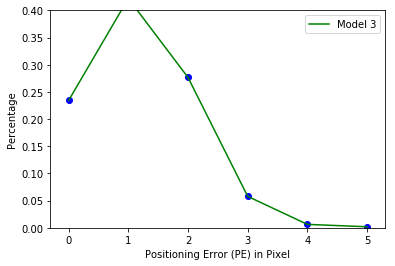

In [14]:
#Check Model II' Accuracy
import glob
import csv
import cv2
import numpy
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

x_array = []
c_array = []
PE_larger_than_5  = []
model = 3
True_Positive = [0,0,0,0]
False_Positive = [0,0,0,0]
Negative = [0,0,0,0]
pic_number = 0
statistics  = []
GroundTruth = {}

for number in range(1,82):
    #################change the path####################################################
    label_path = "/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(number) + "/Label.csv"
    img_path = "/home/nayara/Documentos/TrackNet/Dataset/Clip" + str(number) + "/"
    ####################################################################################

    #read ground truth from Label.csv
    with open(label_path, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        next(spamreader, None)  # skip the headers
        for row in spamreader:
            if row[2] != '':
                FileName = row[0]
                visibility = int(float(row[1]))
                x = int(row[2])
                y = int(row[3])
                GroundTruth[img_path+FileName] = [visibility,x,y]
            else:
                FileName = row[0]
                GroundTruth[img_path+FileName] = [0,-1,-1]



#################change the path####################################################
testing_file_path = "/home/nayara/Documentos/Code/testing_model2.csv"
predition_path = "/home/nayara/Documentos/Data/Prediction/Model" + str(model)+ "/"
####################################################################################

#predict all of the testing image, and check True_Positive, False_Positive, Negative
with open(testing_file_path, 'rb') as csvfile:    
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(spamreader, None)  # skip the headers
    for row in spamreader:
        pic_name = row[0]
        pic_number = pic_number + 1
        #################change the Dataset path####################################################
        heatmap = cv2.imread(pic_name.replace( "/home/nayara/Documentos/Data/Dataset/",  predition_path),0) 
        ####################################################################################

        #heatmap is converted into a binary image by threshold method.
        ret,heatmap = cv2.threshold(heatmap,127,255,cv2.THRESH_BINARY)
        circles = cv2.HoughCircles(heatmap, cv2.HOUGH_GRADIENT,dp=1,minDist=10,param2=2,minRadius=2,maxRadius=7)

        #if there is no ball in ground truth, any prediction should be False Positive, else be Negative
        if GroundTruth[pic_name][1] == -1 and GroundTruth[pic_name][2] == -1:
            if circles is not None:
                    False_Positive[GroundTruth[pic_name][0]] += 1
            else:
                    Negative[GroundTruth[pic_name][0]] += 1

        #the ground truth has x, y be labeled
        else:
            if circles is not None:
                    #if there has only one circle be predicted
                    if len(circles[0]) == 1:
                        x = int(circles[0][0][0])
                        y = int(circles[0][0][1])
                        x2 = pow(GroundTruth[pic_name][1]-x,2)
                        y2 = pow(GroundTruth[pic_name][2]-y,2)

                        #In order to draw the plot, save all of distance in statistics 
                        statistics.append(pow(x2+y2,0.5))

                        #check if distance > 5
                        if pow(x2+y2,0.5) > 5: 
                            False_Positive[GroundTruth[pic_name][0]] += 1
                        else:
                            True_Positive[GroundTruth[pic_name][0]] += 1
                    #if there has more than one circle be predicted, the prediction will be seen as Nagative
                    else:
                        Negative[GroundTruth[pic_name][0]] += 1
            else:
                    Negative[GroundTruth[pic_name][0]] += 1





print "Model" + str(model) + ": Pictures = ", pic_number
print True_Positive[0],True_Positive[1],True_Positive[2],True_Positive[3]
print False_Positive[0],False_Positive[1],False_Positive[2],False_Positive[3]
print Negative[0],Negative[1],Negative[2],Negative[3]
TP = True_Positive[1]+True_Positive[2]+True_Positive[3]

print "Precision:", TP/(0.0+TP+False_Positive[0]+False_Positive[1]+False_Positive[2]+False_Positive[3])
print "Recall:", TP/(0.0+TP+Negative[1]+Negative[2]+Negative[3]+False_Positive[1]+False_Positive[2]+False_Positive[3])

x = []
y = []
c = []
count = 0
others = 0
for i in range(0,6):
    x.append( i)
    y.append(0)

for s in statistics:
    if s - float(int(s)) == 0 and s<=5:
        y[int(s)] +=1
        count +=1
    elif s<=5:
        y[int(s)+1] +=1
        count +=1
    else:
        count +=1
        others += 1
print "Mean:", np.mean(statistics), "Variance", np.var(statistics)


for i in range(0,6):
    c.append( round(y[i]/(count+0.0), 4) )
    print str(i),y[i], y[i]/(count+0.0)
print "Others:", others, others/(count+0.0)
PE_larger_than_5.append(round(others/(count+0.0)*100, 2))
x_array.append(x)
c_array.append(c)

fig, ax = plt.subplots()
axes = plt.gca()
axes.set_ylim([0,0.4])
plt.plot(x,c,color='green', label='Model ' + str(model))
plt.scatter(x,c,color='blue')
plt.ylabel('Percentage')
plt.xlabel('Positioning Error (PE) in Pixel')
plt.legend()
plt.show()
fig.savefig('Model' + str(model) + '.png', dpi=2000)

